In [1]:
# Evaluación y comparación de modelos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model

2025-07-04 17:00:54.577056: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import sys
sys.path.append("../src")  # O "../src" si estás en otra carpeta
import evaluate as ev

In [3]:
# Cargar datos
df = pd.read_csv("../data/hospital_readmission_clean.csv")
X = df.drop("readmitted", axis=1)
y = df["readmitted"]

In [ ]:
# Cargar el modelo de NN
model_nn = load_model("../models/modelo_nn.keras")

In [4]:
# Escalar y dividir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Modelo base
base_model = LogisticRegression()
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
y_pred_log = base_model.predict_proba(X_test)[:, 1]


📊 Evaluación del modelo: Regresión Logística
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17665
           1       0.33      0.03      0.05      2234

    accuracy                           0.88     19899
   macro avg       0.61      0.51      0.49     19899
weighted avg       0.83      0.88      0.84     19899

F1 Score     : 0.0504
Precision    : 0.3297
Recall       : 0.0273
ROC AUC      : 0.6312


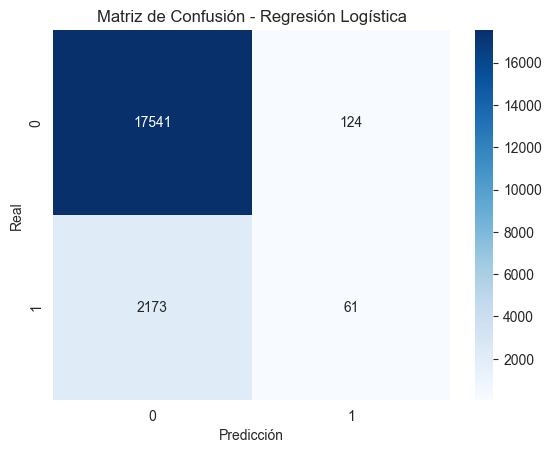

In [6]:
# Evaluar modelo base
ev.evaluate_model(y_test, y_pred_base, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_base, model_name="Regresión Logística")

In [7]:
# Red neuronal (ya entrenada en memoria como `model`)
y_proba_nn = model_nn.predict(X_test).flatten()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

ev.evaluate_model(y_test, y_pred_nn, y_proba_nn, model_name="Red Neuronal")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")


NameError: name 'model_nn' is not defined

In [ ]:
# Comparar curvas ROC
ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_pred_log,
                    label1="Red Neuronal", label2="Regresión Logística")

In [ ]:
#from src.evaluate import compare_models_metrics

# Probabilidades
y_pred_log_proba = base_model.predict_proba(X_test)[:, 1]

# Clases binarias
y_pred_log = (y_pred_log_proba >= 0.5).astype(int)

comparison_df = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_pred_log_proba,
    model_name_1="Red Neuronal",
    model_name_2="Regresión Logística"
)

import pandas as pd
from IPython.display import display
display(comparison_df)

In [ ]:
# Probabilidades del modelo de red neuronal
results_df = ev.evaluate_thresholds(y_test, y_proba_nn)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(results_df["Threshold"], results_df["Precision"], label="Precision")
plt.plot(results_df["Threshold"], results_df["Recall"], label="Recall")
plt.plot(results_df["Threshold"], results_df["F1-score"], label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Evaluación de métricas con distintos thresholds")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar tabla completa
import pandas as pd
from IPython.display import display
display(results_df)